# Aula 3: Atributos Categóricos
**Objetivo da aula:** Ao fim desta aula, o aluno será capaz de operar com atributos categóricos para encontrar segmentações do dataset.

* Fonte dos dados: https://www.kaggle.com/datasets/georgerocha/ifooddataadvancedanalyticstest


Nesta aula, trabalharemos com dados de clientes do iFood. Esses dados foram disponibilizados pelo próprio iFood, e fazem (ou, ao menos, faziam) parte da dinâmica de contratação de pessoas para a equipe de análise de dados da empresa.

# Texto introdutório

Hoje em dia, é comum que empresas tenham dados de seus clientes. Esses dados servem para associar características como a renda ou a situação familiar ao comportamento dos clientes. O objetivo final dessa associação é tentar antecipar as compras que são potencialmente feitas por clientes de determinadas categorias, de forma a guiar ações de marketing como a exibição de propagandas ou a personalização de ofertas.

É possível usar Machine Learning para encontrar automaticamente essas associações, mas algoritmos de aprendizado automático podem encontrar viéses ou coincidências nos bancos de dados. Isso pode levar a situações indesejáveis, como a [propagação de preconceitos](https://www.scientificamerican.com/article/how-a-machine-learns-prejudice/). Além disso, algoritmos de aprendizado são tipicamente caixa-preta, isto é, são [difíceis de explicar](https://news.mit.edu/2022/explainability-machine-learning-0630), o que impede que seus resultados sejam auditáveis e, portanto, torna-os pouco efetivos em ambientes em que alguém deve ser responsabilizado pelos resultados gerados.

Por isso, ainda é importante encontrar segmentos de bancos de dados e aprender com eles. Esse segmento que é escolhido manualmente para fazer alguma análise é chamado de *recorte*. Por exemplo, podemos separar clientes casados de clientes solteiros, e essas categorias compõem nosso *recorte*.

Nesta atividade, faremos *recortes* para descobrir características de clientes do iFood.

# Exercício 1
*Objetivo: ler a base de dados e interpretar suas colunas*

O código abaixo lê os dados do dataset do iFood. Após confirmar que a leitura funciona, procure no site-fonte dos dados uma explicação sobre o conteúdo de cada coluna. O que cada coluna significa?

In [2]:
import pandas as pd

df = pd.read_csv('dados/iFood/ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exercício 2
*Objetivo: contar variáveis categóricas no dataset para caracterizar os seus elementos*

O código abaixo mostra como contar o número de ocorrências de cada categoria em uma coluna de um `dataframe`.

1. Qual é o nível educacional da maior parte dos clientes?
1. Modifique o código para descobrir quantos clientes da base de dados são casados.
1. Analisando a informação de estado civil dos clientes, você acredita que alguns dados podem não ser confiáveis? Caso afirmativo, remova-os do dataframe.

In [3]:
edu = df.value_counts('Marital_Status')
print("---")
print("BASE COMPLETA")
print(edu)
print("---")

# Seleciona somente os valores que estão na lista
filtro = df['Marital_Status'].isin(['Married','Together', 'Single', 'Divorced','Widow'])
df_filtrado = df[filtro]
edu_ = df_filtrado.value_counts('Marital_Status')
print(edu_)
print("---")

# Seleciona somente os valores Married
filtro1 = df['Marital_Status'] == 'Married'
novo = df[filtro1]
novo.value_counts('Marital_Status')

---
BASE COMPLETA
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
---
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: count, dtype: int64
---


Marital_Status
Married    864
Name: count, dtype: int64

# Exercício 3
*Ordenar colunas categóricas para evidenciar que tratam-se de níveis de uma progressão*

Embora a "educação" seja uma variável categórica (uma vez que não tem valores numéricos), existe uma ordenação inerente às categorias. Podemos informar ao Pandas qual é essa ordenação usando o código abaixo.

1. A ordenação das categorias foi informada manualmente. Seria possível, neste caso específico, automatizar completamente o processo? Por que?
1. Por que é necessário informar o parâmetro `sort=False` na chamada de `value_counts`?
1. Modifique o código para passar a mostrar o estado civil (*marital status*) dos usuários. Neste caso, a ordenação ainda faz sentido?

In [107]:
# CATEGORICAL - CATEGORIAS SÃO ORDENADAS
df['Education'] = pd.Categorical(df['Education'], ["Basic", "2n Cycle", "Graduation", "Master", "PhD"])
edu = df.value_counts('Education', sort=False)
# SORT = TRUE - ORDENA OS VALORES NUMERICAMENTE
# SORT = FALSE - ORDENA OS VALORES CATEGORICAMENTE (NIVEIS QUE VOCÊ COLOCOU - P,M,G)
print(edu)

Education
Basic           54
2n Cycle       203
Graduation    1127
Master         370
PhD            486
Name: count, dtype: int64


In [108]:
# CATEGORICAL - CATEGORIAS SÃO ORDENADAS
df['Education'] = pd.Categorical(df['Marital_Status'], ["Single", "Together", "Married", "Divorced", "Widow"])
edu = df.value_counts('Education', sort=False)
print(edu)

Education
Single      480
Together    580
Married     864
Divorced    232
Widow        77
Name: count, dtype: int64


# Exercício 4
*Mostrar a contagem de variáveis categóricas em plots de barras*

O código abaixo mostra como mostrar as contagens que calculamos em um gráfico de barras.

1. "Gráfico de barras" é o mesmo que "histograma"? Por que?
-O histograma tem uma ideia de continuidade e o grafico de barras não precisa ter necessariamente

HISTOGRAMA - > Gráfico de barras que a altura da barra é a contagem de elementos (Para a direita é maior) (Caso específico do gráfico de barras)

BOXPLOT

SCATTERPLOT

PIZZA - > IMPRECISO / CONTRASTE MUITO GRANDE

GRAFICO DE LINHA - > Continuidade

GRAFICO DE BARRAS - > BARRAS mostrando categorias discretas (Não é continuo) - categorias (Comparação ao longo de várias categorias)

1. Modifique a chamada do gráfico para passar a mostrar as contagens de clientes de acordo com o estado civil.

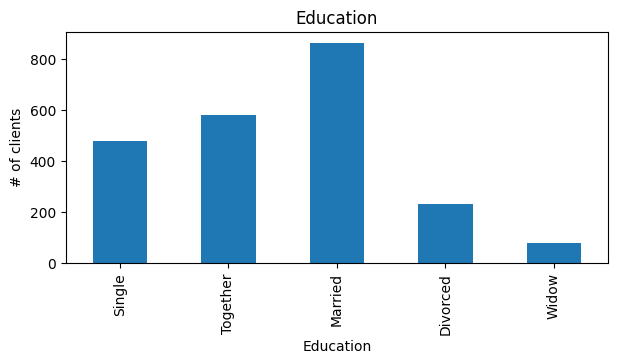

In [109]:
import matplotlib.pyplot as plt
plt.style.use('default')
#import seaborn as sns


#sns.barplot(x=edu.index, y=edu, color='b')
edu.plot.bar(figsize=(7,3))
plt.title('Education')
plt.ylabel('# of clients')
plt.xlabel('Education')
plt.show()

# Exercício 5
*Objetivo: fazer contagens usando duas variáveis categóricas simultaneamente*

A função `crosstab` do Pandas cria uma tabela relacionando contagens de duas variáveis categóricas.

1. O que significa cada elemento da tabela que foi criada?
1. O parâmetro `normalize` pode receber os valores `False`, `True`, `index` ou `columns`. O que cada um deles significa?
1. Um cliente típico do iFood tem que combinação de nível de educação e estado civil?

In [125]:
df_ = pd.crosstab(index=df['Education'], columns=df['Marital_Status'],normalize=True)
# Normalize são frações
print(df_)


Marital_Status    Absurd     Alone  Divorced   Married    Single  Together  \
Education                                                                    
2n Cycle        0.000000  0.000000  0.010268  0.036161  0.016518  0.025446   
Basic           0.000000  0.000000  0.000446  0.008929  0.008036  0.006250   
Graduation      0.000446  0.000446  0.053125  0.193304  0.112500  0.127679   
Master          0.000446  0.000446  0.016518  0.061607  0.033482  0.047321   
PhD             0.000000  0.000446  0.023214  0.085714  0.043750  0.052232   

Marital_Status     Widow      YOLO  
Education                           
2n Cycle        0.002232  0.000000  
Basic           0.000446  0.000000  
Graduation      0.015625  0.000000  
Master          0.005357  0.000000  
PhD             0.010714  0.000893  


# Exercício 6
*Objetivo: analisar duas propostas de gráficos de barras para mostrar dados*

No código abaixo, temos duas propostas de códigos de barras: um com barras lado-a-lado e outro com barras empilhadas.

1. As cores das barras, suas larguras e suas cores estão permitindo uma boa visualização dos dados? Consulte a documentação e modifique os parâmetros que achar necessário.
1. Que informações podemos ver no gráfico lado-a-lado que é mais difícil visualizar no gráfico de barras empilhadas?
1. Que informações podemos ver no gráfico empilhado que é mais difícil visualizar no gráfico de barras lado-a-lado?

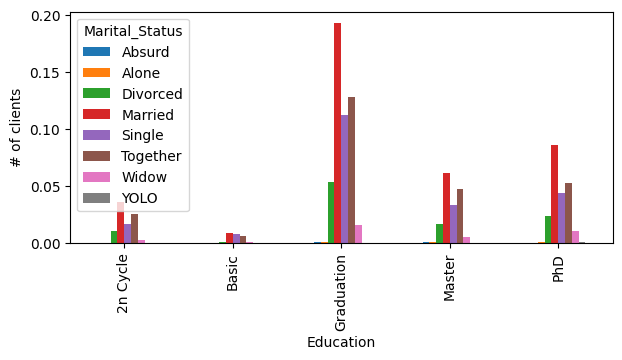

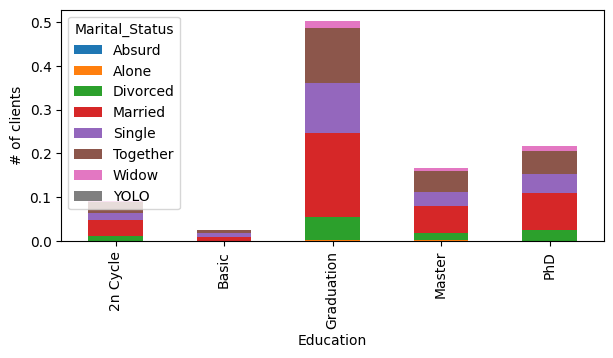

In [126]:
df_.plot.bar(stacked=False, figsize=(7,3))
#stacket - > Empilhado
plt.ylabel('# of clients')
plt.xlabel('Education')
plt.show()


df_.plot.bar(stacked=True, figsize=(7,3))
plt.ylabel('# of clients')
plt.xlabel('Education')
plt.show()

# Exercício 7
*Objetivo: ler e entender documentação do Pandas. Transpor um dataframe e visualizar os resultados*

O método `transpose()` inverte as linhas e colunas de um dataframe. Consulte a documentação do método e use-o para mostrar um gráfico de barras que evidencie os níveis educacionais de clientes casados, solteiros e divorciados.

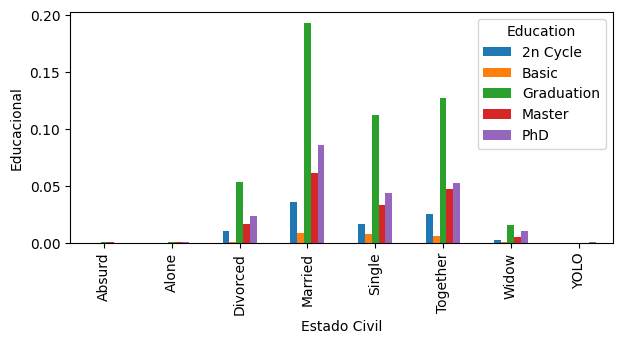

In [131]:
# Espaço para resolver o exercício 7
# Transpose - > Coluna vira linha e Linha vira coluna
df_transpose = df_.transpose()
df_transpose.plot.bar(stacked=False, figsize=(7,3))

#stacket - > Empilhado

plt.ylabel('Educacional')
plt.xlabel('Estado Civil')
plt.show()



# Exercício 8
*Objetivo: mostrar dados bi-dimensionais em uma figura*

Faz parte do senso comum pensar que, quanto maior o nível educacional de uma pessoa, maior será sua renda.

1. Faça uma figura que responda à pergunta: "na base de clientes do iFood, pessoas de nível educacional maior têm a renda maior?"
1. Usando as técnicas que aprendemos hoje, faça uma figura que evidencie a resposta à sua pergunta.
2. Não esqueça de rotular eixos e colocar título na figura! No título, tanto a pergunta quanto a resposta devem ficar evidentes.


In [166]:
# QUESTÃO QUE PODERIA CAIR NA PROVA


# Espaço para resolver o exercício 8
# Normalize são frações

#Calcular alguem que tem segundo grau
df = pd.read_csv('dados/iFood/ml_project1_data.csv')
df['Education'].value_counts()

filtro_2n = df['Education'] == '2n Cycle'
df_2n = df[filtro_2n]
renda_2n = df_2n['Income'].mean()
print(renda_2n)

filtro_phd = df['Education'] == 'PhD'
df_phd = df[filtro_phd]
renda_phd = df_phd['Income'].mean()
print(renda_phd)

# Gráfico de barras
df_ = pd.DataFrame()
df_['PhD'] = renda_phd
df_['2n Cycle'] = renda_2n

plt.figure(figsize=(3,3))
df_.transpose().plot.bar()
plt.show()


47633.19
56145.31392931393


TypeError: no numeric data to plot

<Figure size 300x300 with 0 Axes>